<a href="https://colab.research.google.com/github/eziong/MachineLearning02/blob/master/Assignment06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Plot the training data


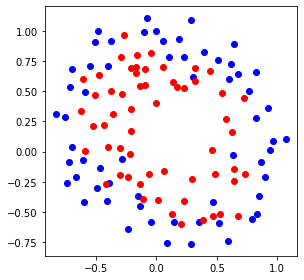

#Write down the high dimesional function


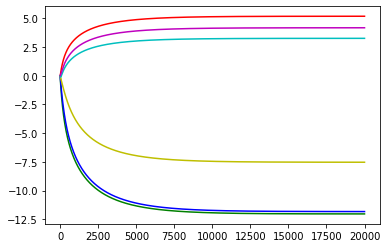

#Plot the training error


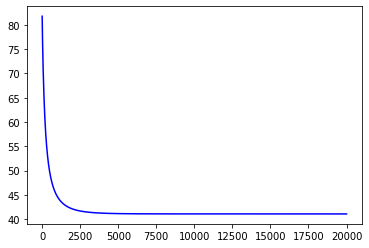

#Plot the training accuracy


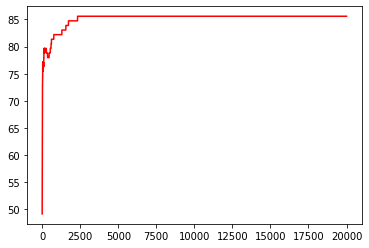

#Write down the final training accuracy
85.59322033898306  % accuracy
#Plot the optimal classifier superimposed on the training data


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:155: UserWarning: The following kwargs were not used by contour: 'linewidth'


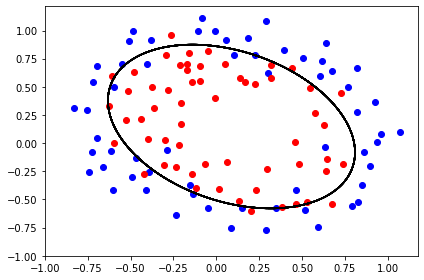

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

data = np.genfromtxt('data-nonlinear.txt', delimiter=',')

pointX  = data[:, 0]
pointY  = data[:, 1]
label   = data[:, 2]

pointX0 = pointX[label == 0]
pointY0 = pointY[label == 0]

pointX1 = pointX[label == 1]
pointY1 = pointY[label == 1]


### Definitions of z, sigma, objective function, weight, high dimensional function
def z(theta,X):
  return g(theta,X)

def sigma(z):
  return 1/(1+np.exp(-z))

def J(l,z):
  sum = 0
  for i in range(len(l)):
    sum = sum + l[i]*(-np.log(sigma(z[i])))+(1-l[i])*(-np.log(1-sigma(z[i])))
  return sum

def J_prime(_z,_l,_xi):
    return (sigma(_z)-_l)*_xi


def GD_algoritm(theta,z,l,X,alpha):
  for i in range(len(l)):
    theta[0] = theta[0] - alpha*w(z[i],l[i],X[0][i])
    theta[1] = theta[1] - alpha*w(z[i],l[i],X[1][i]*X[1][i])
    theta[2] = theta[2] - alpha*w(z[i],l[i],X[2][i]*X[2][i])
    theta[3] = theta[3] - alpha*w(z[i],l[i],X[1][i]*X[2][i])
    theta[4] = theta[4] - alpha*w(z[i],l[i],X[1][i])
    theta[5] = theta[5] - alpha*w(z[i],l[i],X[2][i])
    
  return theta

def w(z,l,xi):
  return J_prime(z,l,xi)

def g(theta, X):
  z = X[0]*theta[0] + X[1]*X[1]*theta[1] + X[2]*X[2]*theta[2] + X[1]*X[2]*theta[3] + X[1]*theta[4] + X[2]*theta[5]
  return z

def accuracy_cal(z,l):
  res = 0
  for i in range(len(z)):
    if (sigma(z[i]) >=1/2 and l[i]==1) or (sigma(z[i]) <1/2 and l[i]==0):
      res = res + 1
  return res


### Basic Settings
pointC = np.ones(len(pointX))
X = [pointC,pointX,pointY]
l=label
theta0 = 0
theta1 = 0
theta2 = 0
theta3 = 0
theta4 = 0
theta5 = 0
theta = [theta0,theta1,theta2,theta3,theta4,theta5]
err_theta0 = []
err_theta1 = []
err_theta2 = []
err_theta3 = []
err_theta4 = []
err_theta5 = []
err_J = []
alpha = 5*1e-3 #learning rate
accuracy = []


### Plot the training error
## iteration of gradient decent until convergence
for _ in range(20000):
  zet = z(theta,X)
  J_val = J(l,zet)
  err_J.append(J_val)
  err_theta0.append(theta[0])
  err_theta1.append(theta[1])
  err_theta2.append(theta[2])
  err_theta3.append(theta[3])
  err_theta4.append(theta[4])
  err_theta5.append(theta[5])
  accuracy_val = accuracy_cal(zet,l) / len(l) * 100
  accuracy.append(accuracy_val)
  theta = GD_algoritm(theta,zet,l,X,alpha)

t0=theta[0]
t1=theta[1]
t2=theta[2]
t3=theta[3]
t4=theta[4]
t5=theta[5]

def f(x,y):
  return sigma(t0 + x*x*t1 + y*y*t2 + x*y*t3 + x*t4 + y*t5)


xx = np.linspace(-1,1,10000)
yy = np.linspace(-1,1,10000)
x_mesh,y_mesh = np.meshgrid(xx,yy)
zz = f(x_mesh,y_mesh)


#Plot the training data
print("#Plot the training data")
plt.figure()
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

#Write down the high dimesional function
print("#Write down the high dimesional function")
plt.plot(err_theta0,color='r')
plt.plot(err_theta1,color='g')
plt.plot(err_theta2,color='b')
plt.plot(err_theta3,color='y')
plt.plot(err_theta4,color='c')
plt.plot(err_theta5,color='m')
plt.show()

#Plot the training error
print("#Plot the training error")
plt.plot(err_J,color='b')
plt.show()

#Plot the training accuracy
print("#Plot the training accuracy")
plt.plot(accuracy,color='r')
plt.show()

#Write down the final training accuracy
print("#Write down the final training accuracy")
print(accuracy[len(accuracy)-1] , " % accuracy")

#Plot the optimal classifier superimposed on the training data
print("#Plot the optimal classifier superimposed on the training data")
plt.figure()
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.contour(x_mesh,y_mesh,np.round(zz,3)==0.5,colors='k',linewidth=.5)
plt.show()